# 1. Carga de las librerías

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import kagglehub
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Configura la visualización
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

# 2. Carga de los datos
Se cargan los archivos del conjunto de datos desde Kaggle para analizar cada uno de los archivos que forman parte del mismo.

In [2]:
# Descarga la última versión de los datos
path = kagglehub.dataset_download("arnabbiswas1/microsoft-azure-predictive-maintenance")
#Ruta a los archivos
print(f"Ruta a los archivos del conjunto de datos:{path}")
print(f"\nArchivos disponibles:{os.listdir(path)}")

Ruta a los archivos del conjunto de datos:/Users/isabel/.cache/kagglehub/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance/versions/3

Archivos disponibles:['PdM_maint.csv', 'PdM_errors.csv', 'PdM_machines.csv', 'PdM_failures.csv', 'PdM_telemetry.csv']


In [3]:
# Carga de los archivos csv
errors_data = pd.read_csv(os.path.join(path, "PdM_errors.csv"))
failures_data = pd.read_csv(os.path.join(path, "PdM_failures.csv"))
machines_data = pd.read_csv(os.path.join(path, "PdM_machines.csv"))
maint_data = pd.read_csv(os.path.join(path, "PdM_maint.csv"))
telemetry_data = pd.read_csv(os.path.join(path, "PdM_telemetry.csv"))

# 3. Exploración de los datos 
## 3.1 Resumen de los datos

In [4]:
# Se crea un diccionario con los nombres de los archivos como claves y los datasets como valores
datasets = {
    "PdM_telemetry": telemetry_data,
    "PdM_errors": errors_data,
    "PdM_maint": maint_data,
    "PdM_failures": failures_data,
    "PdM_machines": machines_data
}

In [5]:
# Se explora cada dataset
for name, dataset in datasets.items():
    print(f"\n================ Resumen del dataset {name} ================\n")
    dataset.info()

    # Se muestra el número de observaciones y variables
    print(f'\nHay {dataset.shape[0]} registros y {dataset.shape[1]} variables en el dataset {name}.')
    
    # Se muestra el nombre de las variables
    print(f'Nombre de las variables del dataset: {dataset.columns.tolist()}')

    # Se muestran las primeras filas del dataset
    print(f'\nPrimeras filas del dataset:\n {dataset.head()}')


================ Resumen del dataset PdM_telemetry ================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB

Hay 876100 registros y 6 variables en el dataset PdM_telemetry.
Nombre de las variables del dataset: ['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration']

Primeras filas del dataset:
               datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-0

Se verifica el intervalo de tiempo en el que se registraron las diferentes observaciones para cada dataset.

In [6]:
# Se  muestra el rango de fechas para cada dataset
for name, dataset in datasets.items():
    if 'datetime' in dataset.columns:  # Verifica si el dataframe tiene la columna 'datetime'
        min_date = dataset['datetime'].min()
        max_date = dataset['datetime'].max()
       
        print(f"Rango de fechas del dataset {name}: Desde {min_date} hasta {max_date}\n")

Rango de fechas del dataset PdM_telemetry: Desde 2015-01-01 06:00:00 hasta 2016-01-01 06:00:00

Rango de fechas del dataset PdM_errors: Desde 2015-01-01 06:00:00 hasta 2016-01-01 05:00:00

Rango de fechas del dataset PdM_maint: Desde 2014-06-01 06:00:00 hasta 2016-01-01 06:00:00

Rango de fechas del dataset PdM_failures: Desde 2015-01-02 03:00:00 hasta 2015-12-31 06:00:00



Se analizan los valores únicos de las variables cualitativas del conjunto de datos:

In [7]:
# Se muestran los valores únicos de model (modelo de máquina)
print(f'Valores únicos en "model":',machines_data['model'].unique())

Valores únicos en "model": ['model3' 'model4' 'model2' 'model1']


In [8]:
# Se muestran los valores únicos en errorID (tipo de error)
print(f'Valores únicos en "errorID":',errors_data['errorID'].unique())

Valores únicos en "errorID": ['error1' 'error3' 'error5' 'error4' 'error2']


In [9]:
# Se muestran los valores únicos para failure (componente reemplazado por fallo)
print(f'Valores únicos en "failure":',failures_data['failure'].unique())

Valores únicos en "failure": ['comp4' 'comp1' 'comp2' 'comp3']


In [10]:
# Se muestran los valores únicos para comp (componente reeplazado por mantenimiento)
print(f'Valores únicos en "comp":',maint_data['comp'].unique())

Valores únicos en "comp": ['comp2' 'comp4' 'comp3' 'comp1']


El conjunto de datos dispone de 100 máquinas y 4 modelos diferentes de máquinas (model1, model2, model3, model4).
Además, existen 5 tipos de errores (error1, error2, error3, error4, error5) y hay 4 componentes (comp1, comp2, comp3, comp4) que pueden ser reemplazados, ya sea debido a un fallo (`failure`) o a mantenimiento (`comp`).

## 3.2 Resumen estadístico de los datos

In [11]:
# Estadística descriptiva de cada dataset
for name, dataset in datasets.items():
    print(f"\nEstadistica descriptiva ==========================================================")
    print(f"Dataset {name} ")
    print(f"\n{dataset.describe()}\n")


Estadistica descriptiva ==========================================================
Dataset PdM_telemetry 

           machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072  


Estadistica descriptiva =====================================

**PdM_telemetry** es el dataset que resulta más interesante obtener la estadística descriptiva ya que contiene los datos de los sensores. En el  resto de datasets la única variable numérica es `machineID` y además `age` en **PdM_machines**.

# 4. Analisis exploratorio de datos
## 4.1 Tablas de  frecuencia

Se obtienen las tablas de frecuencia y porcentaje para las variables categóricas `model`, `errorID`, `failure` y `comp`. Luego, se obtienen las tablas de frecuencias cruzadas entre `model` y el resto de columnas categóricas.

In [12]:
# Diccionario para almacenar tablas de frecuencias y porcentajes por dataset
frequency_tables_by_dataset = {}

# Se recorrer cada dataset en el diccionario
for dataset_name, data in datasets.items():
    simple_frequency_tables = {}
    
    # Se procesan las columnas especificadas si están presentes en el dataset
    for col in ['model', 'errorID', 'failure', 'comp']:
        if col in data.columns:
            # Se crea la tabla de frecuencias simples
            freq_table = data[col].value_counts()
            total = len(data[col])
            
            # Se calcula el porcentaje
            percentage_table = (freq_table / total * 100).round(2)
            
            # Se combinan frecuencias y porcentajes en un DataFrame
            combined_table = pd.DataFrame({
                'Frecuencia': freq_table,
                'Porcentaje (%)': percentage_table
            })
            
            simple_frequency_tables[col] = combined_table

            # Se muestra la tabla
            print(f"\nTabla de frecuencias y porcentajes para '{col}' \nen el dataset '{dataset_name}':\n")
            print(combined_table)
    
    # Se almacenar las tablas generadas para el dataset actual
    frequency_tables_by_dataset[dataset_name] = simple_frequency_tables


Tabla de frecuencias y porcentajes para 'errorID' 
en el dataset 'PdM_errors':

         Frecuencia  Porcentaje (%)
errorID                            
error1         1010           25.77
error2          988           25.21
error3          838           21.38
error4          727           18.55
error5          356            9.08

Tabla de frecuencias y porcentajes para 'comp' 
en el dataset 'PdM_maint':

       Frecuencia  Porcentaje (%)
comp                             
comp2         863           26.26
comp4         811           24.68
comp3         808           24.59
comp1         804           24.47

Tabla de frecuencias y porcentajes para 'failure' 
en el dataset 'PdM_failures':

         Frecuencia  Porcentaje (%)
failure                            
comp2           259           34.03
comp1           192           25.23
comp4           179           23.52
comp3           131           17.21

Tabla de frecuencias y porcentajes para 'model' 
en el dataset 'PdM_machines':

      

In [13]:
# Tablas de frecuencias y porcentajes cruzados
def create_cross_tables(datasets):
    cross_frequency_tables = {}
    
    # Mapeo de columnas a sus datasets correspondientes
    column_dataset_map = {
        'errorID': 'PdM_errors',
        'failure': 'PdM_failures',
        'comp': 'PdM_maint'
    }
    
    # Asegurarse de que 'model' está disponible en machines_data
    models = datasets['PdM_machines']['model']
    
    for col, dataset_name in column_dataset_map.items():
        if dataset_name in datasets and col in datasets[dataset_name].columns:
            # Obtener el dataset correspondiente
            current_data = datasets[dataset_name]
            
            # Merge con machines_data para obtener el modelo
            if 'machineID' in current_data.columns:
                merged_data = current_data.merge(
                    datasets['PdM_machines'][['machineID', 'model']], 
                    on='machineID', 
                    how='left'
                )
                
                # Crea la tabla de frecuencias cruzadas
                freq_table = pd.crosstab(
                    index=merged_data['model'], 
                    columns=merged_data[col], 
                    margins=True, 
                    margins_name="Total"
                )
                
                # Calcula la tabla de porcentajes por fila (sin incluir los totales)
                percentage_table = freq_table.iloc[:, :-1].div(freq_table['Total'], axis=0) * 100
                percentage_table['Total'] = 100  # Añadir el 100% en la columna Total
                percentage_table = percentage_table.round(2)  # Redondear a 2 decimales
                
                # Combina frecuencias y porcentajes en un diccionario
                combined_table = {
                    'Frecuencia': freq_table,
                    'Porcentaje (%)': percentage_table
                }
                
                cross_frequency_tables[col] = combined_table
                
                # Se muestran las tablas
                print(f"\nTablas para '{col}':")
                print("\nTabla de frecuencias:")
                print(freq_table)
                print("\nTabla de porcentajes (%):")
                print(percentage_table)
                print("\n" + "="*80)
    
    return cross_frequency_tables

# Para usar la función:
cross_frequency_tables = create_cross_tables(datasets)


Tablas para 'errorID':

Tabla de frecuencias:
errorID  error1  error2  error3  error4  error5  Total
model                                                 
model1      152     154     139     152      75    672
model2      176     164     119     181      62    702
model3      352     346     317     193     120   1328
model4      330     324     263     201      99   1217
Total      1010     988     838     727     356   3919

Tabla de porcentajes (%):
errorID  error1  error2  error3  error4  error5  Total
model                                                 
model1    22.62   22.92   20.68   22.62   11.16    100
model2    25.07   23.36   16.95   25.78    8.83    100
model3    26.51   26.05   23.87   14.53    9.04    100
model4    27.12   26.62   21.61   16.52    8.13    100
Total     25.77   25.21   21.38   18.55    9.08    100


Tablas para 'failure':

Tabla de frecuencias:
failure  comp1  comp2  comp3  comp4  Total
model                                     
model1      33     46 

##  4.2 Gráficos
### 4.2.1 Gráficos de barras

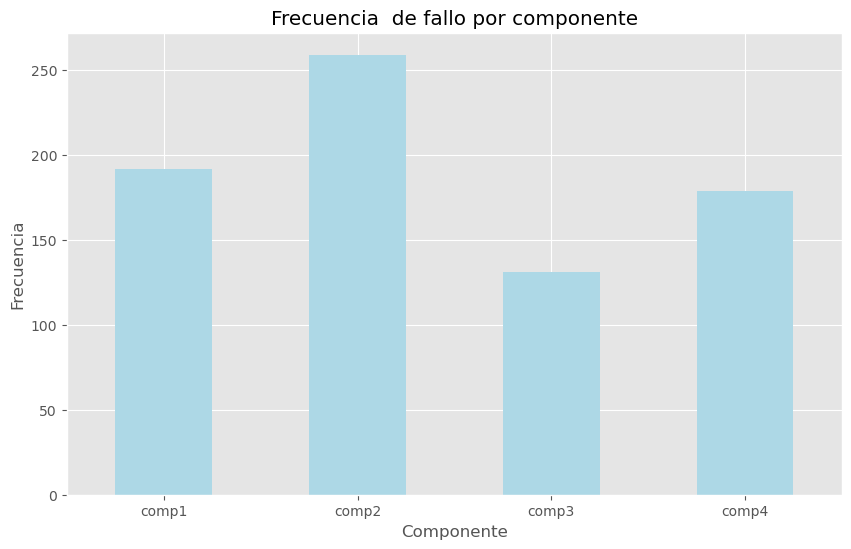

In [14]:
# Se cuentan las frecuencias de los fallos por componente
failure_counts = failures_data['failure'].value_counts()

# Se especifica un orden manual de los componentes
ordered_components = ['comp1', 'comp2', 'comp3', 'comp4']

# Se reordenan los conteos de acuerdo con el orden especificado
failure_counts = failure_counts.reindex(ordered_components, fill_value=0)

# Se crea el gráfico de barras
plt.figure(figsize=(10,6))
failure_counts.plot(kind='bar', color='lightblue')

# Configuración de etiquetas y título
plt.title('Frecuencia  de fallo por componente')
plt.xlabel('Componente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Se muestra el gráfico
plt.show()

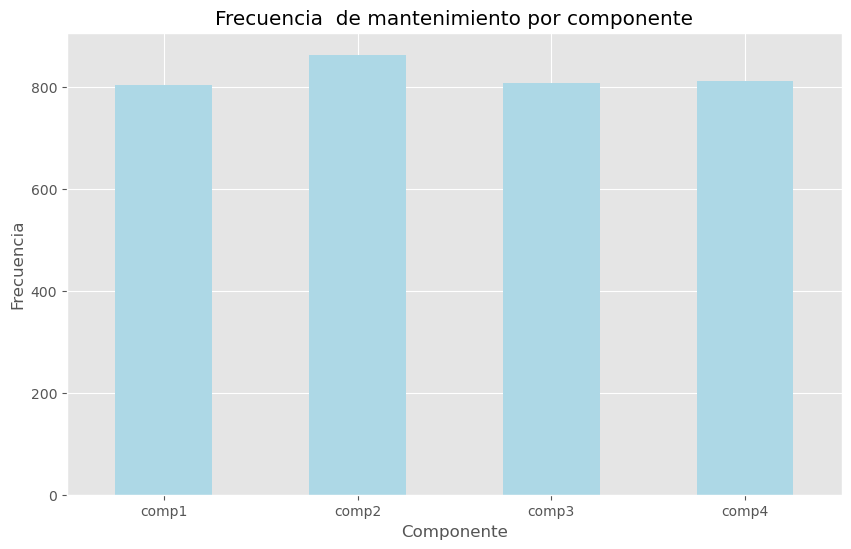

In [15]:
# Se cuentan las frecuencias de los fallos por componente
maint_counts = maint_data['comp'].value_counts()

# Se especifica un orden manual de los componentes
ordered_components = ['comp1', 'comp2', 'comp3', 'comp4']

# Se reordenan los conteos de acuerdo con el orden especificado
maint_counts = maint_counts.reindex(ordered_components, fill_value=0)

# Se crea el gráfico de barras
plt.figure(figsize=(10,6))
maint_counts.plot(kind='bar', color='lightblue')

# Configuración de etiquetas y título
plt.title('Frecuencia  de mantenimiento por componente')
plt.xlabel('Componente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Se muestra el gráfico
plt.show()

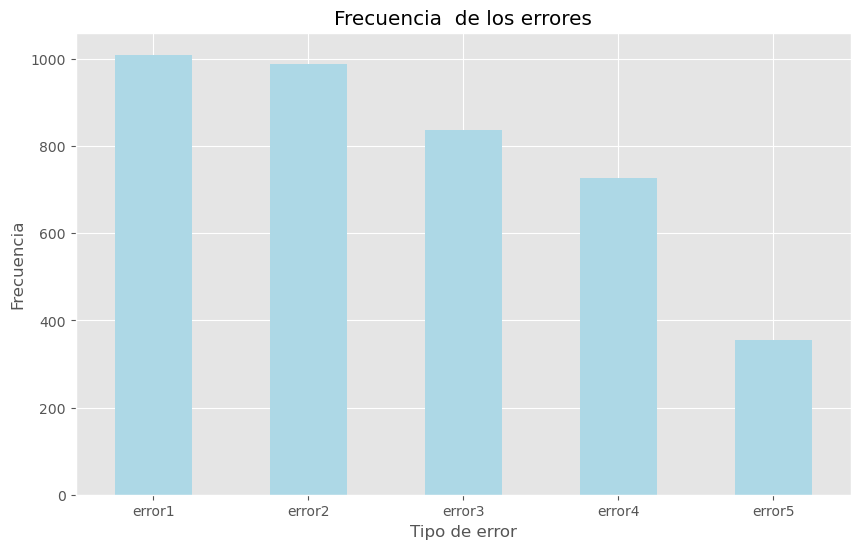

In [16]:
# Se cuentan las frecuencias de los errores
error_counts = errors_data['errorID'].value_counts()

# Se especifica un orden manual de los errores
ordered_components = ['error1', 'error2', 'error3', 'error4', 'error5']

# Se reordenan los conteos de acuerdo con el orden especificado
error_counts = error_counts.reindex(ordered_components, fill_value=0)

# Se crea el gráfico de barras
plt.figure(figsize=(10,6))
error_counts.plot(kind='bar', color='lightblue')

# Configuración de etiquetas y título
plt.title('Frecuencia  de los errores')
plt.xlabel('Tipo de error')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Se muestra el gráfico
plt.show()

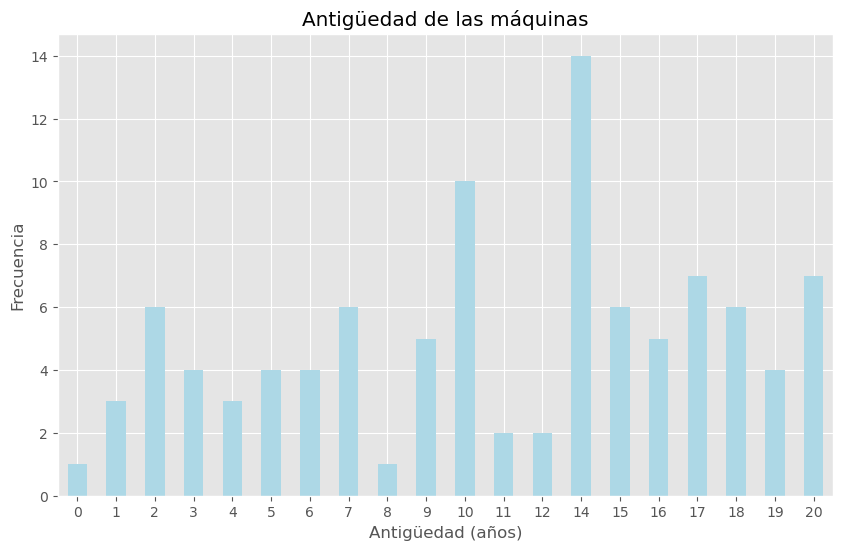

In [17]:
# Contar las frecuencias de las edades
ages_counts = machines_data['age'].value_counts()

# Se ordenan las frecuencias por la edad (índice)
ages_counts = ages_counts.sort_index(ascending=True)  

# Se crea el gráfico de barras
plt.figure(figsize=(10,6))
ages_counts.plot(kind='bar', color='lightblue')

# Configuración de etiquetas y título
plt.title('Antigüedad de las máquinas')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Se muestra el gráfico
plt.show()

### 5.2.2 Histogramas
En primer lugar, se obtienen los histogramas de las variables `volt`, `rotate`, `pressure` y  `vibration` sin tener en cuenta ninguna otra variable.

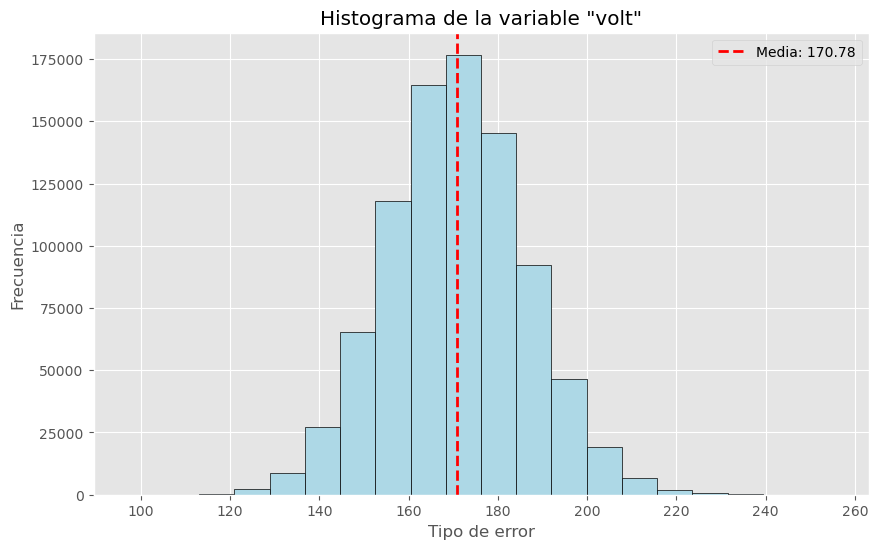

In [18]:
# Se calcula la media de la variable
volt_mean=telemetry_data['volt'].mean()

# Se crea el  histograma para la variable 'volt'
plt.figure(figsize=(10,6))

plt.hist(telemetry_data['volt'], bins=20, edgecolor='black', color='lightblue')
plt.axvline(volt_mean, color='red', linestyle='dashed',linewidth=2, label=f'Media: {volt_mean:.2f}')
plt.title('Histograma de la variable "volt"')
plt.xlabel('Tipo de error')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

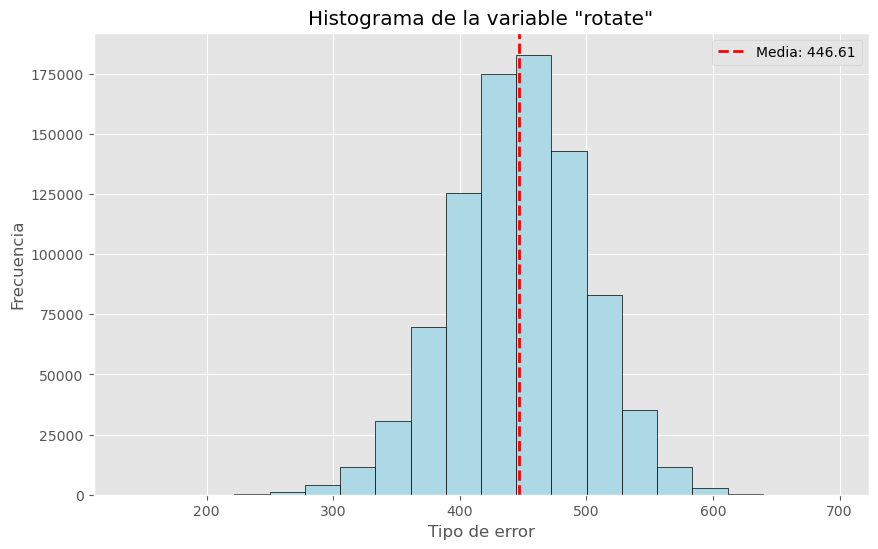

In [19]:
# Se calcula la media de la variable
rotate_mean=telemetry_data['rotate'].mean()

# Se crea el  histograma para la variable 'rotate'
plt.figure(figsize=(10,6))

plt.hist(telemetry_data['rotate'], bins=20, edgecolor='black', color='lightblue')
plt.axvline(rotate_mean, color='red', linestyle='dashed',linewidth=2, label=f'Media: {rotate_mean:.2f}')
plt.title('Histograma de la variable "rotate"')
plt.xlabel('Tipo de error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

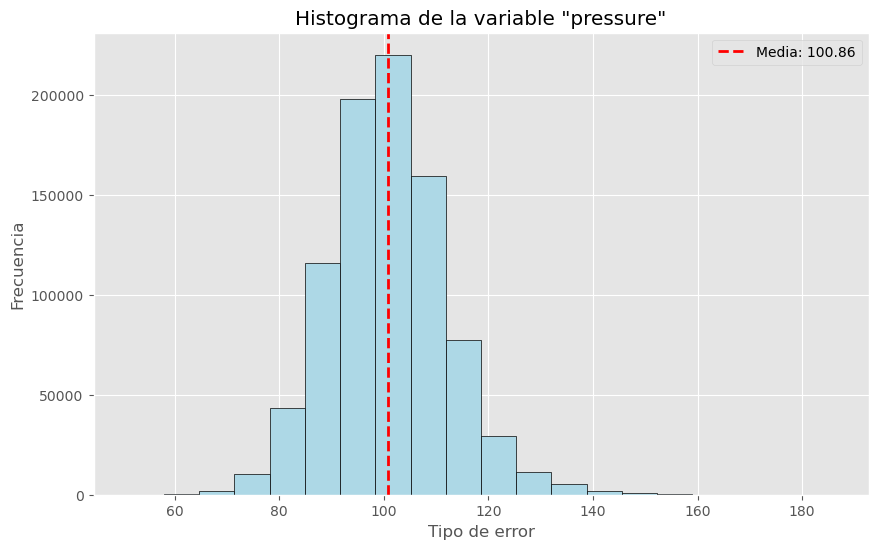

In [20]:
# Se calcula la media de la variable
pressure_mean=telemetry_data['pressure'].mean()

# Se crea el  histograma para la variable 'pressure'
plt.figure(figsize=(10,6))

plt.hist(telemetry_data['pressure'], bins=20, edgecolor='black', color='lightblue')
plt.axvline(pressure_mean, color='red', linestyle='dashed',linewidth=2, label=f'Media: {pressure_mean:.2f}')
plt.title('Histograma de la variable "pressure"')
plt.xlabel('Tipo de error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

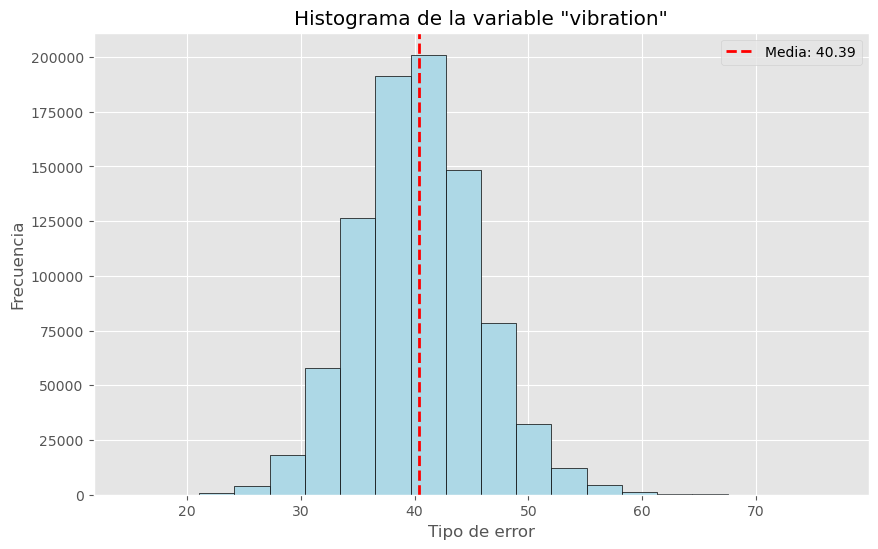

In [21]:
# Se calcula la media de la variable
vibration_mean=telemetry_data['vibration'].mean()

# Se crea el  histograma para la variable 'rotate'
plt.figure(figsize=(10,6))

plt.hist(telemetry_data['vibration'], bins=20, edgecolor='black', color='lightblue')
plt.axvline(vibration_mean, color='red', linestyle='dashed',linewidth=2, label=f'Media: {vibration_mean:.2f}')
plt.title('Histograma de la variable "vibration"')
plt.xlabel('Tipo de error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Luego se obtienen los histogramas de las variables `volt`, `rotate`, `pressure` y  `vibration` para cada clase de fallo.

In [22]:
# Se combinan los datasets de manera que se puedan relacionar las variables 
merged_data = pd.merge(telemetry_data, failures_data, on=['machineID', 'datetime'], how='left')

# Reemplazar los NaN en la columna 'failure' por 'NoFailure'
merged_data['failure'] = merged_data['failure'].fillna('NoFailure')

# Definir el orden deseado para los tipos de fallo
failure_order = ['NoFailure', 'comp1', 'comp2', 'comp3', 'comp4']

# Número de filas y columnas para las subgráficas
n_cols = 3  # 3 columnas
n_rows = 2  # 2 filas

Histogramas de la variable "volt".


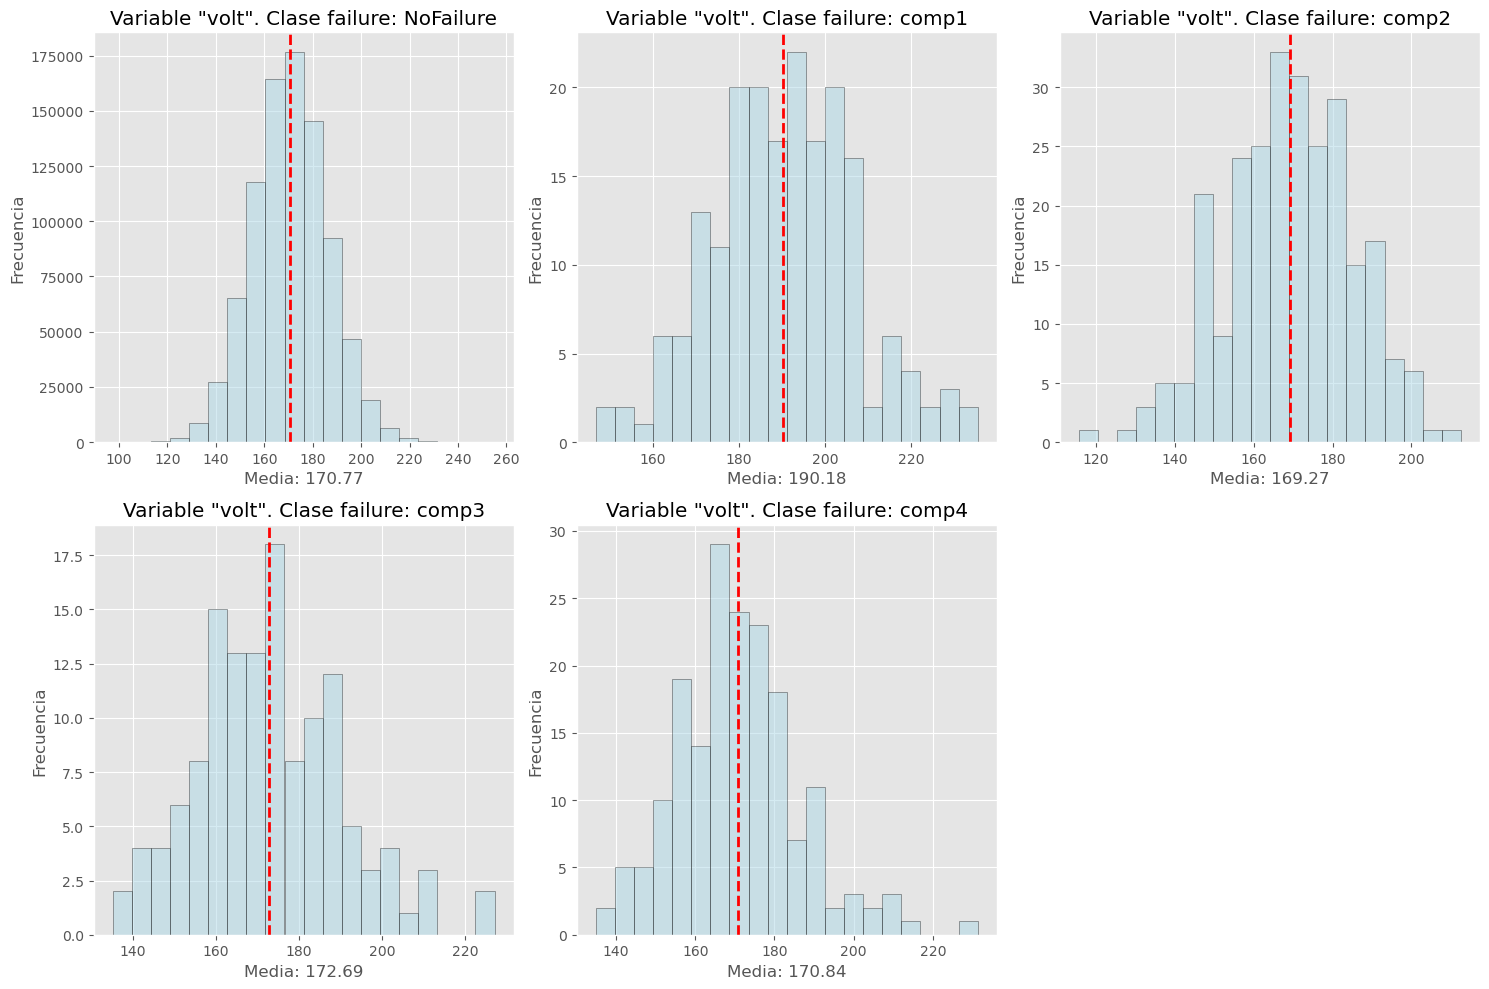

In [23]:
print(f'Histogramas de la variable "volt".')

# Se crea la figura y los ejes para las subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Se itera sobre los tipos de fallo en el orden deseado
for i, fail in enumerate(failure_order):
    # Filtrar los datos para este tipo de fallo
    subset = merged_data[merged_data['failure'] == fail]
    
    # Calcular la media de la variable
    volt_mean = subset['volt'].mean()
    
    # Crear el histograma
    axes[i].hist(subset['volt'], bins=20, alpha=0.5, edgecolor='black', color='lightblue')
    axes[i].axvline(volt_mean, color='red', linestyle='dashed', linewidth=2)
    
    # Títulos y etiquetas
    axes[i].set_title(f'Variable "volt". Clase failure: {fail}')
    axes[i].set_xlabel(f'Media: {volt_mean:.2f}')
    axes[i].set_ylabel('Frecuencia')

#  Se eliminan los subgráficos vacíos
for j in range(len(failure_order), len(axes)):
    fig.delaxes(axes[j])

# Se ajustar el layout para que las subgráficas no se superpongan
plt.tight_layout()
plt.show()

Histogramas de la variable "rotate".


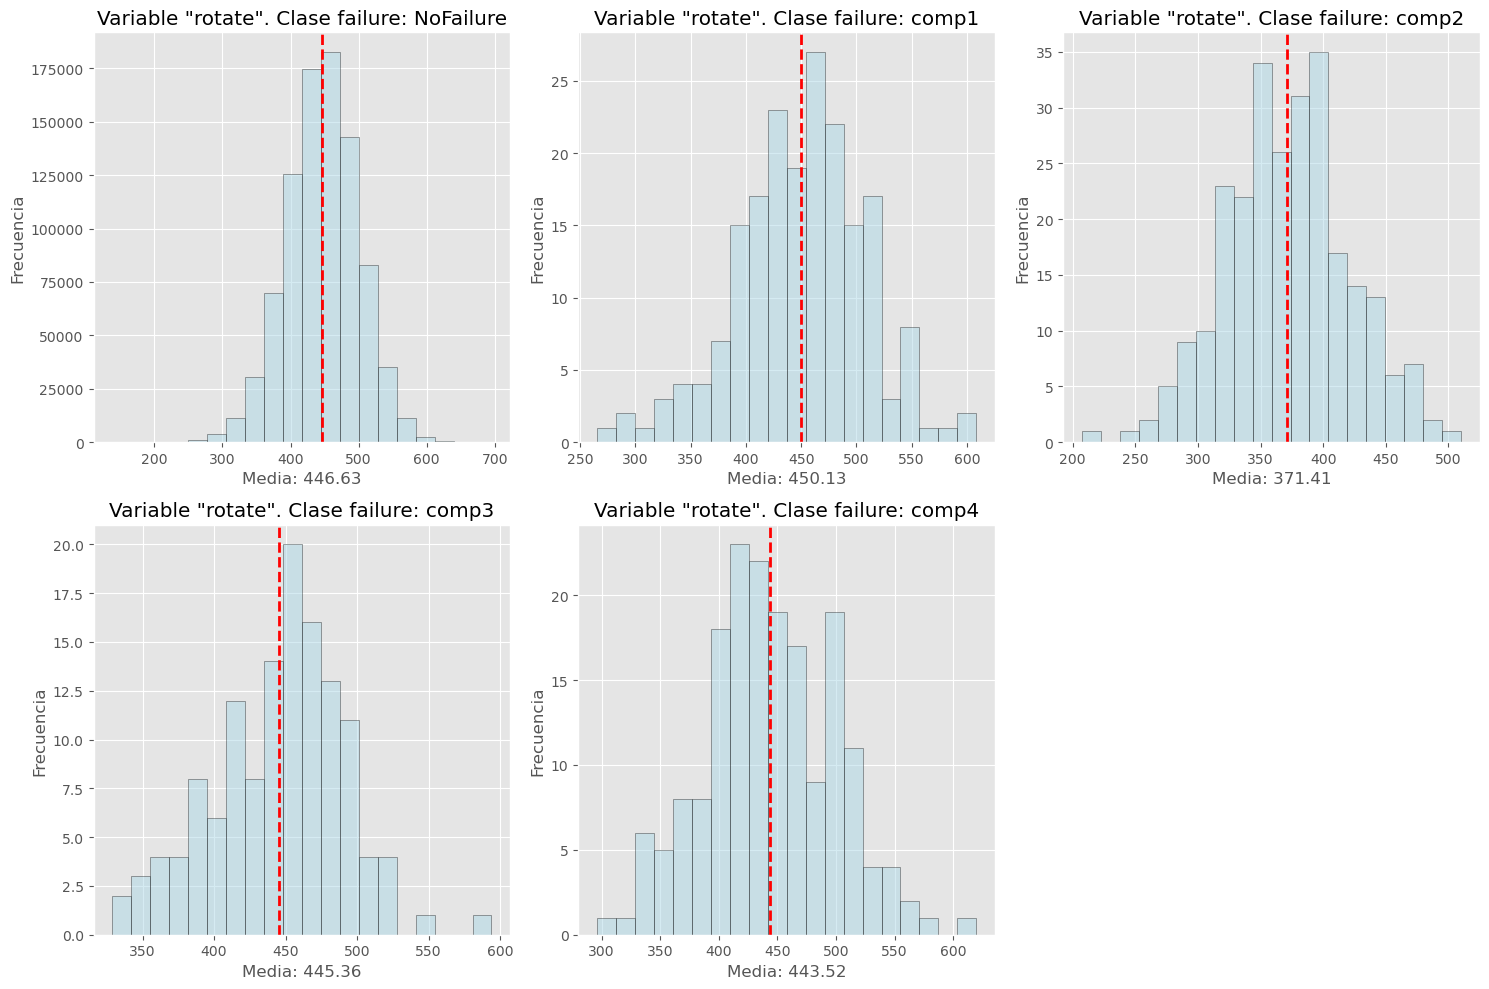

In [24]:
print(f'Histogramas de la variable "rotate".')

# Se crea la figura y los ejes para las subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Se itera sobre los tipos de fallo en el orden deseado
for i, fail in enumerate(failure_order):
    # Filtrar los datos para este tipo de fallo
    subset = merged_data[merged_data['failure'] == fail]
    
    # Calcular la media de la variable
    rotate_mean = subset['rotate'].mean()
    
    # Crear el histograma
    axes[i].hist(subset['rotate'], bins=20, alpha=0.5, edgecolor='black', color='lightblue')
    axes[i].axvline(rotate_mean, color='red', linestyle='dashed', linewidth=2)
    
    # Títulos y etiquetas
    axes[i].set_title(f'Variable "rotate". Clase failure: {fail}')
    axes[i].set_xlabel(f'Media: {rotate_mean:.2f}')
    axes[i].set_ylabel('Frecuencia')

# Se eliminan los subgráficos vacíos
for j in range(len(failure_order), len(axes)):
    fig.delaxes(axes[j])

# Se ajustar el layout para que las subgráficas no se superpongan
plt.tight_layout()
plt.show()

Histogramas de la variable "pressure".


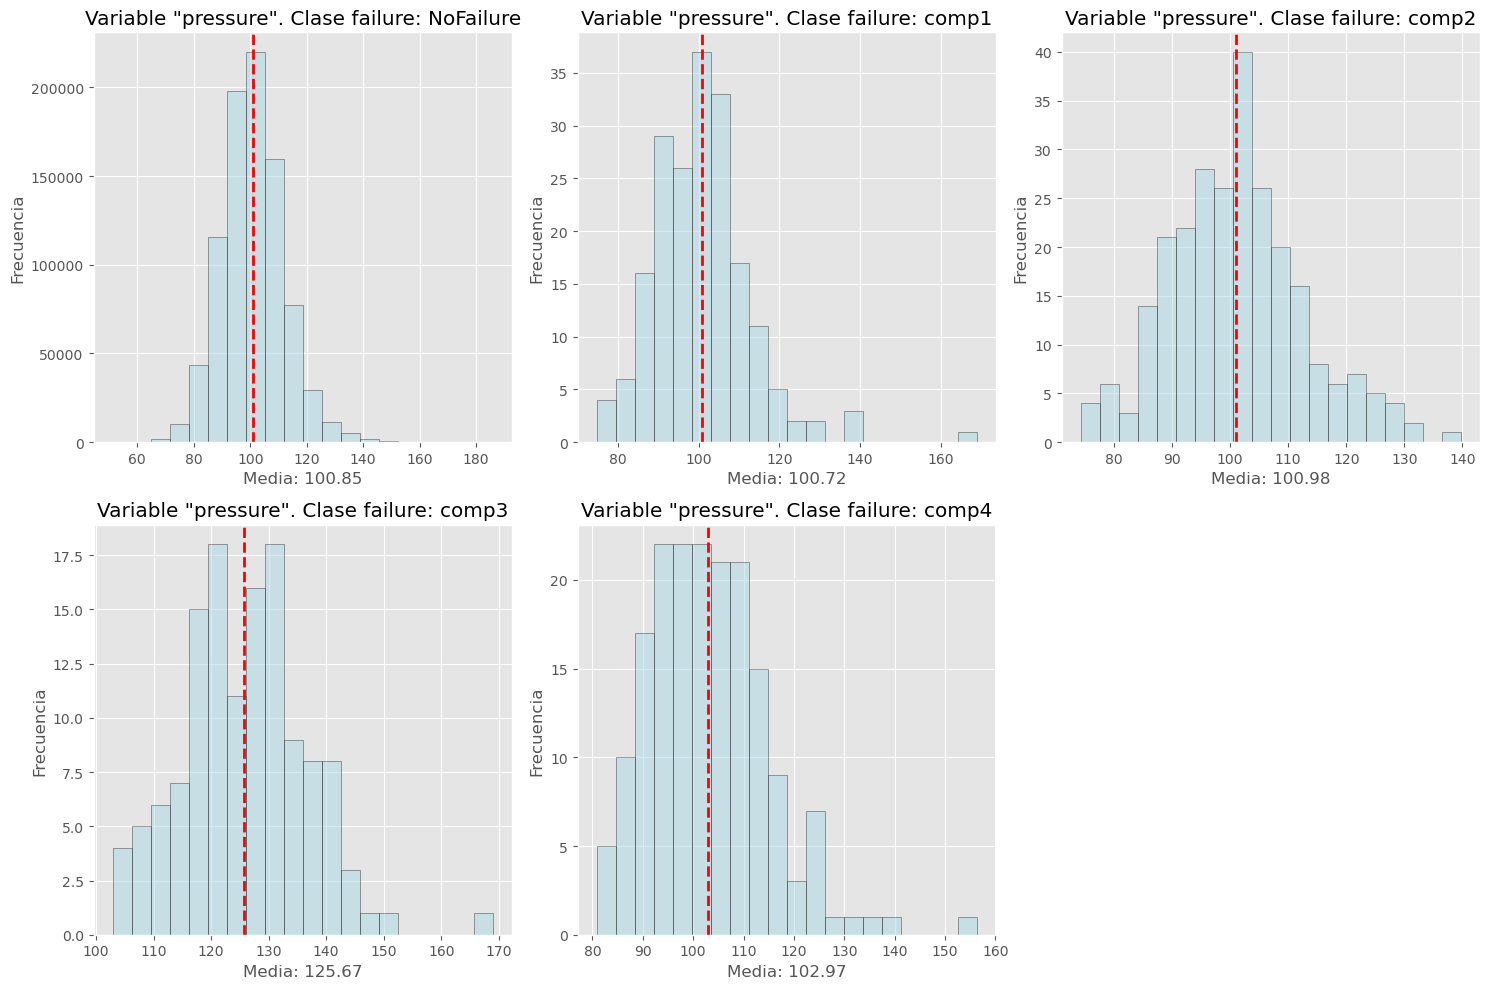

In [25]:
print(f'Histogramas de la variable "pressure".')

# Se crea la figura y los ejes para las subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Se itera sobre los tipos de fallo en el orden deseado
for i, fail in enumerate(failure_order):
    # Filtrar los datos para este tipo de fallo
    subset = merged_data[merged_data['failure'] == fail]
    
    # Calcular la media de la variable
    pressure_mean = subset['pressure'].mean()
    
    # Crear el histograma
    axes[i].hist(subset['pressure'], bins=20, alpha=0.5, edgecolor='black', color='lightblue')
    axes[i].axvline(pressure_mean, color='red', linestyle='dashed', linewidth=2)
    
    # Títulos y etiquetas
    axes[i].set_title(f'Variable "pressure". Clase failure: {fail}')
    axes[i].set_xlabel(f'Media: {pressure_mean:.2f}')
    axes[i].set_ylabel('Frecuencia')

# Se eliminan los subgráficos vacíos
for j in range(len(failure_order), len(axes)):
    fig.delaxes(axes[j])

# Se ajustar el layout para que las subgráficas no se superpongan
plt.tight_layout()
plt.show()

Histogramas de la variable "vibration".


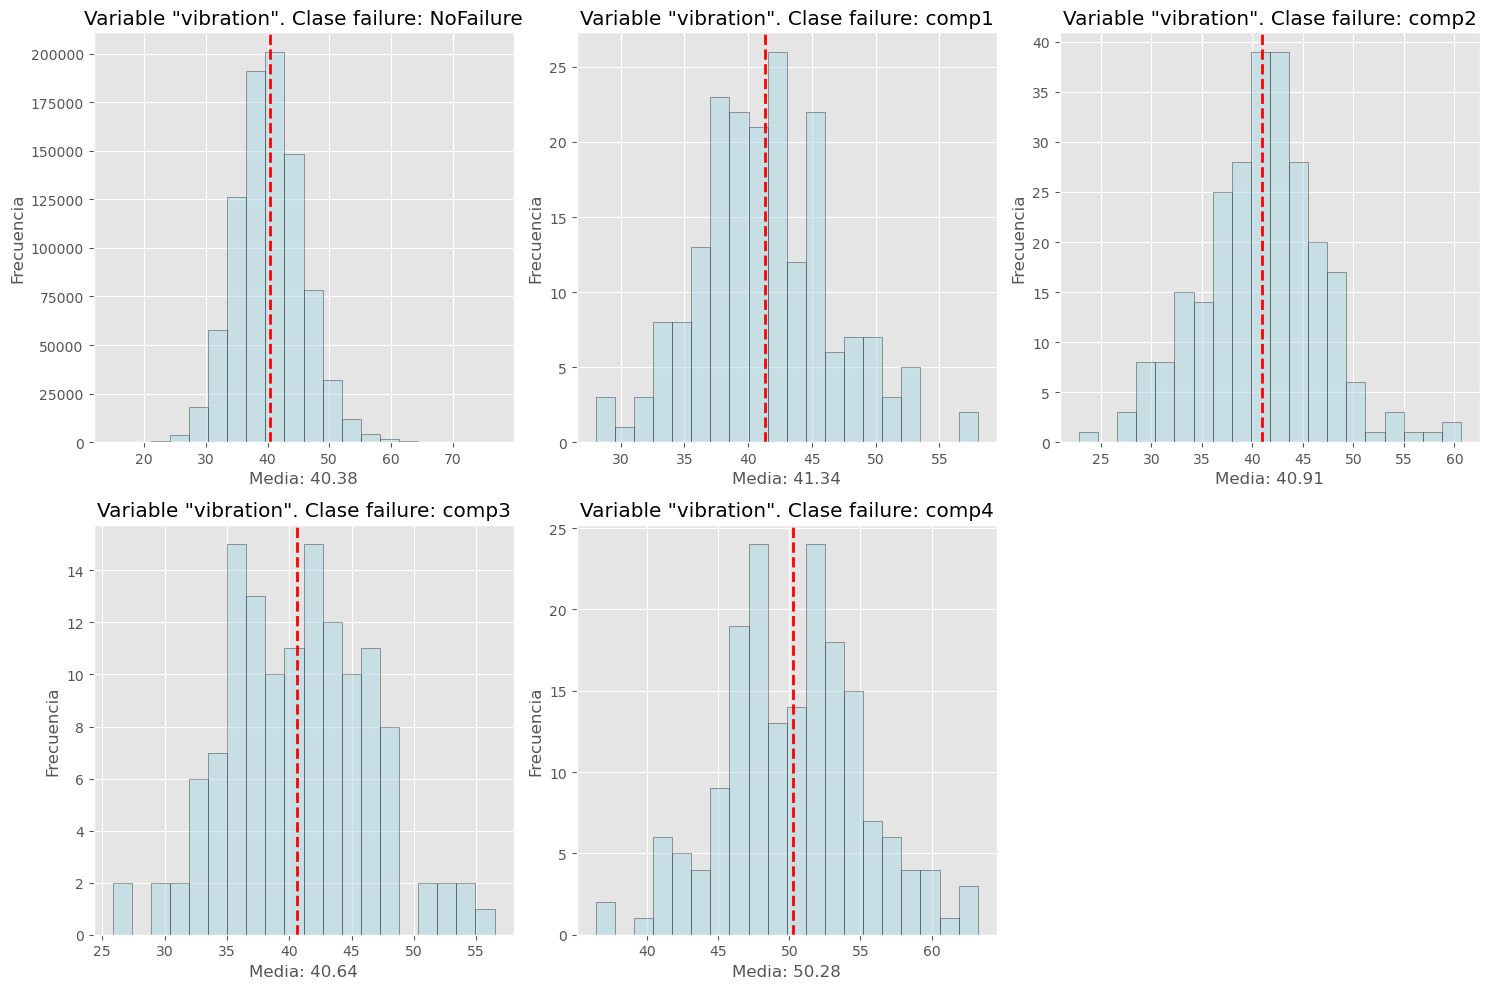

In [26]:
print(f'Histogramas de la variable "vibration".')

# Se crea la figura y los ejes para las subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Se itera sobre los tipos de fallo en el orden deseado
for i, fail in enumerate(failure_order):
    # Filtrar los datos para este tipo de fallo
    subset = merged_data[merged_data['failure'] == fail]
    
    # Calcular la media de la variable
    vibration_mean = subset['vibration'].mean()
    
    # Crear el histograma
    axes[i].hist(subset['vibration'], bins=20, alpha=0.5, edgecolor='black', color='lightblue')
    axes[i].axvline(vibration_mean, color='red', linestyle='dashed', linewidth=2)
    
    # Títulos y etiquetas
    axes[i].set_title(f'Variable "vibration". Clase failure: {fail}')
    axes[i].set_xlabel(f'Media: {vibration_mean:.2f}')
    axes[i].set_ylabel('Frecuencia')

# Se eliminan los subgráficos vacíos
for j in range(len(failure_order), len(axes)):
    fig.delaxes(axes[j])

# Se ajustar el layout para que las subgráficas no se superpongan
plt.tight_layout()
plt.show()

## 4.3 Análisis  temporal de los datos

In [27]:
replacement_map = {
    'errorID': 'NoError',
    'failure': 'NoFailure'
}

# Se unen los datasets para crear el dataset unificado 
merged2_dataset = pd.merge(telemetry_data, failures_data, on=['datetime', 'machineID'], how='left')
merged2_dataset['failure'] = merged2_dataset['failure'].fillna(replacement_map['failure'])

merged2_dataset = pd.merge(merged2_dataset, errors_data, on=['datetime', 'machineID'], how='left')
merged2_dataset['errorID'] = merged2_dataset['errorID'].fillna(replacement_map['errorID'])

# Se transforman las fechas a formato datetime 
merged2_dataset["datetime"] = pd.to_datetime(merged2_dataset["datetime"], format="%Y-%m-%d %H:%M:%S")

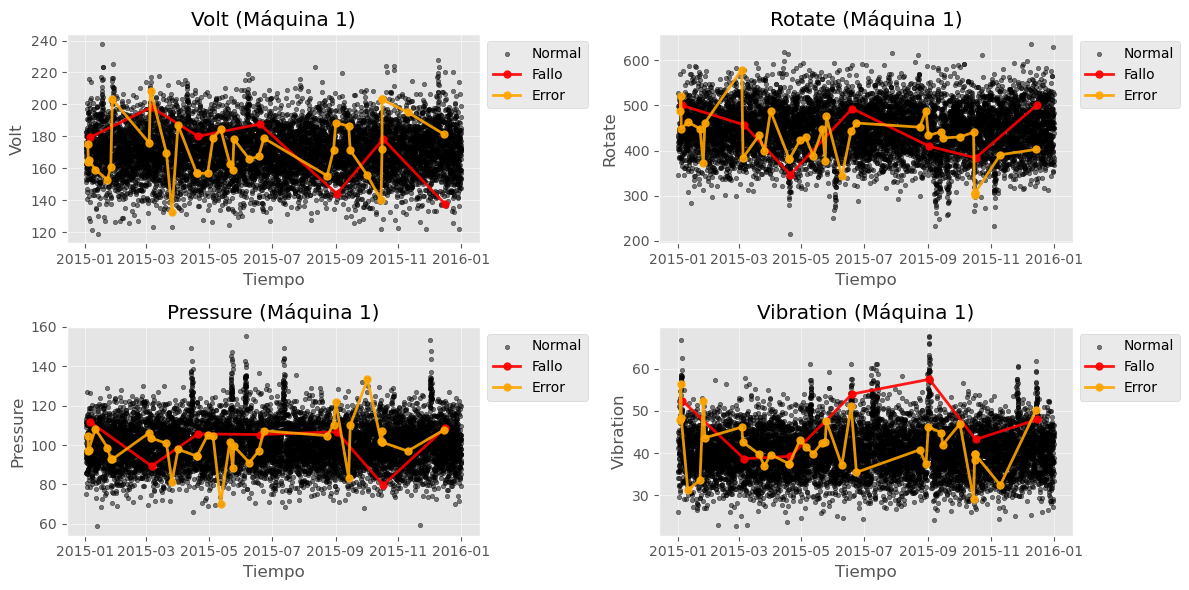

In [28]:
# ID de la máquina a analizar
machine_id = 1

# Se filtran los datos para la máquina seleccionada
machine_data = merged2_dataset[merged2_dataset['machineID'] == machine_id]

# Variables numéricas a analizar
variables = ['volt', 'rotate', 'pressure', 'vibration']

# Se crea una figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Datos sin fallo
    normal_data = machine_data[machine_data['failure'] == 'NoFailure']
    ax.scatter(
        normal_data['datetime'],
        normal_data[var],
        color="black",
        label="Normal",
        s=10,  
        alpha=0.5
    )
    
    # Fallos
    failure_data = machine_data[machine_data['failure'] != 'NoFailure']
    ax.plot(
        failure_data['datetime'],
        failure_data[var],
        color="red",
        label="Fallo",
        alpha=0.9,
        linewidth=2,
        marker='o',  
        markersize=5 
    )
    
    # Errores
    error_data = machine_data[machine_data['errorID'] != 'NoError']
    ax.plot(
        error_data['datetime'],
        error_data[var],
        color="orange",
        label="Error",
        alpha=0.9,
        linewidth=2,
        marker='o',  
        markersize=5 
    )
    
    ax.set_title(f"{var.capitalize()} (Máquina {machine_id})")
    ax.set_xlabel("Tiempo")
    ax.set_ylabel(var.capitalize())
    ax.legend(
        loc='upper left',  
        bbox_to_anchor=(1, 1),  
    )
    ax.grid(alpha=0.5) 

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


In [29]:
# Se crean características temporales a partir de la variable datetime
merged2_dataset['hour'] = merged2_dataset['datetime'].dt.hour  # Hora del día
merged2_dataset['day_of_week'] = merged2_dataset['datetime'].dt.dayofweek  # Día de la semana  (0=Lunes, 6=Domingo)
merged2_dataset['week_of_year'] = merged2_dataset['datetime'].dt.isocalendar().week  # Semana del año
merged2_dataset['month'] =merged2_dataset['datetime'].dt.month  # Mes (1=Enero, 12=Diciembre)

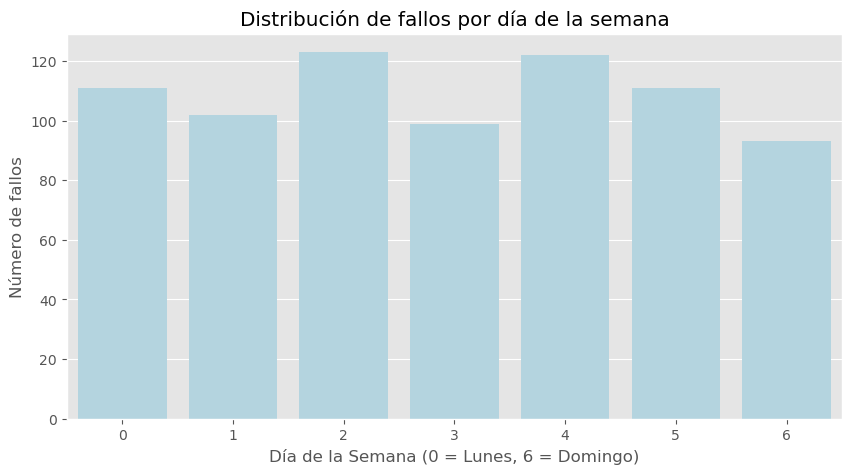

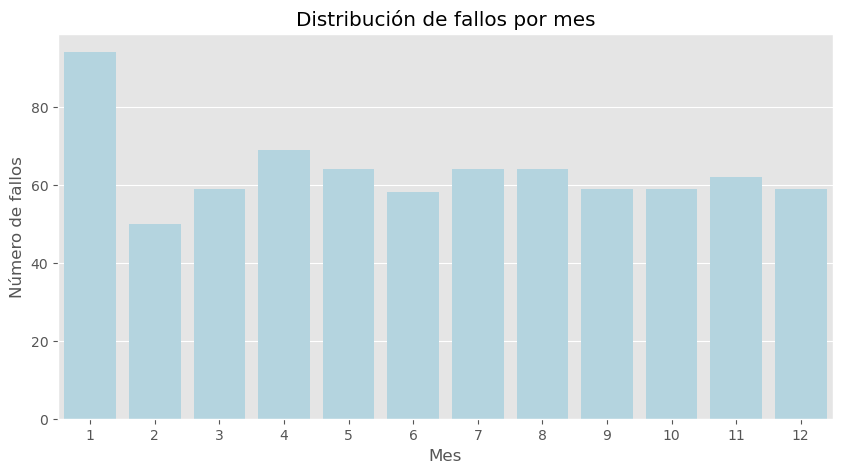

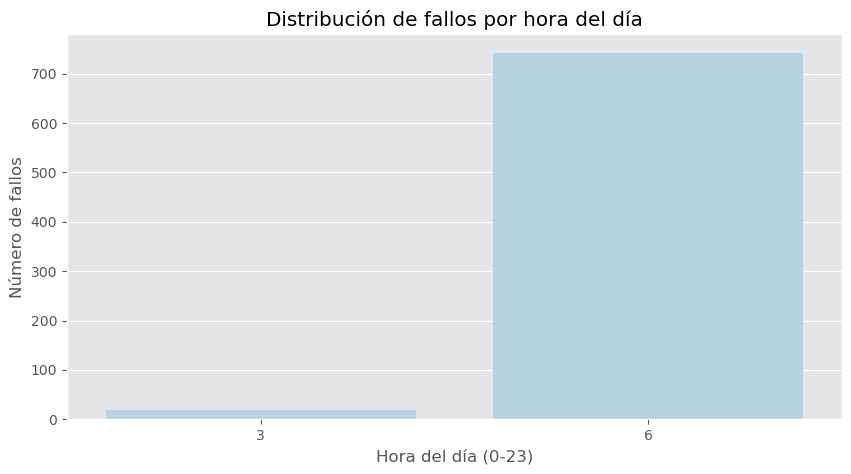

In [30]:
# Se filtran los datos de fallos
data_failure = merged2_dataset[merged2_dataset['failure'] != 'NoFailure']

# 1. Distribución de fallos por día de la semana
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=data_failure, color='lightblue')
plt.title('Distribución de fallos por día de la semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Número de fallos')
#plt.grid(axis='y')
plt.show()

# 2. Distribución de fallos por mes
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=data_failure, color='lightblue')
plt.title('Distribución de fallos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de fallos')
#plt.grid(axis='y')
plt.show()

# 3. Distribución de fallos por hora del día
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=data_failure, color='lightblue')
plt.title('Distribución de fallos por hora del día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Número de fallos')
#plt.grid(axis='y')
plt.show()

## 4.4 Correlación entre variables
### 4.4.1 Matriz de correlación
Para comprobar si existe una relación directa entre variables, se realiza un análisis de correlación  entre las  variables numéricas  y  se muestra la  matriz de  correlación  obtenida.

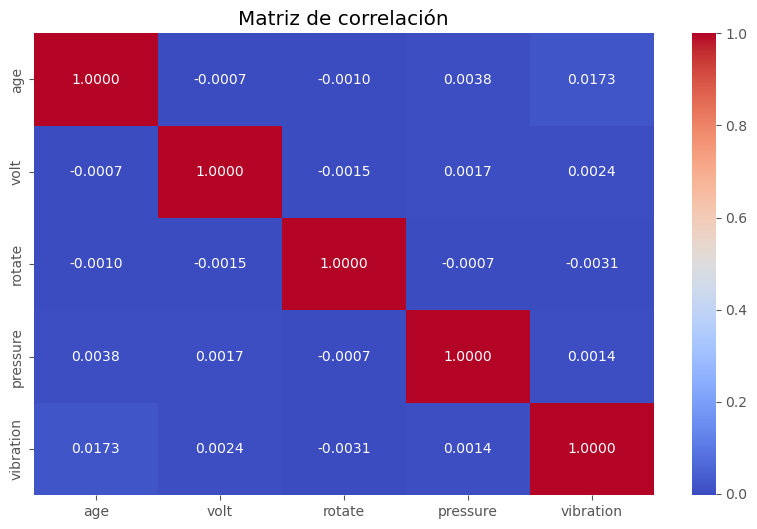

In [31]:
# Se combinan los datasets machines_data (age) y telemetry_data (volt, rotate, pressure, vibration)
merged3_data = pd.merge(telemetry_data, machines_data, on='machineID', how='left')

# Se seleccionan las columnas necesarias
selected_columns = ['age', 'volt', 'rotate', 'pressure', 'vibration']
subset_data = merged3_data[selected_columns]

# Se calcula la matriz de correlación
corr_matrix = subset_data.corr()

# Se crea el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

No se encuentra correlación entre las variables analizadas.

------

# 5.Preparación de los datos  
## 5.1 Limpieza de los  datos
### 5.1.1 Valores faltantes y duplicados
Se comprueba si hay valores faltantes o  duplicados en cada uno de los datasets

In [32]:
# Se comprueba si hay valores faltantes o duplicados
for name, dataset in datasets.items():
    print(f"\nDataset {name} ")
    print("\nValores faltantes:")
    print(dataset.isnull().sum())       # Valores faltantes por columna
    print("\nDuplicados:", dataset.duplicated().sum()) 


Dataset PdM_telemetry 

Valores faltantes:
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Duplicados: 0

Dataset PdM_errors 

Valores faltantes:
datetime     0
machineID    0
errorID      0
dtype: int64

Duplicados: 0

Dataset PdM_maint 

Valores faltantes:
datetime     0
machineID    0
comp         0
dtype: int64

Duplicados: 0

Dataset PdM_failures 

Valores faltantes:
datetime     0
machineID    0
failure      0
dtype: int64

Duplicados: 0

Dataset PdM_machines 

Valores faltantes:
machineID    0
model        0
age          0
dtype: int64

Duplicados: 0


### 5.1.2 Valores atípicos o “outliers”


========= Boxplot PdM_telemetry =========


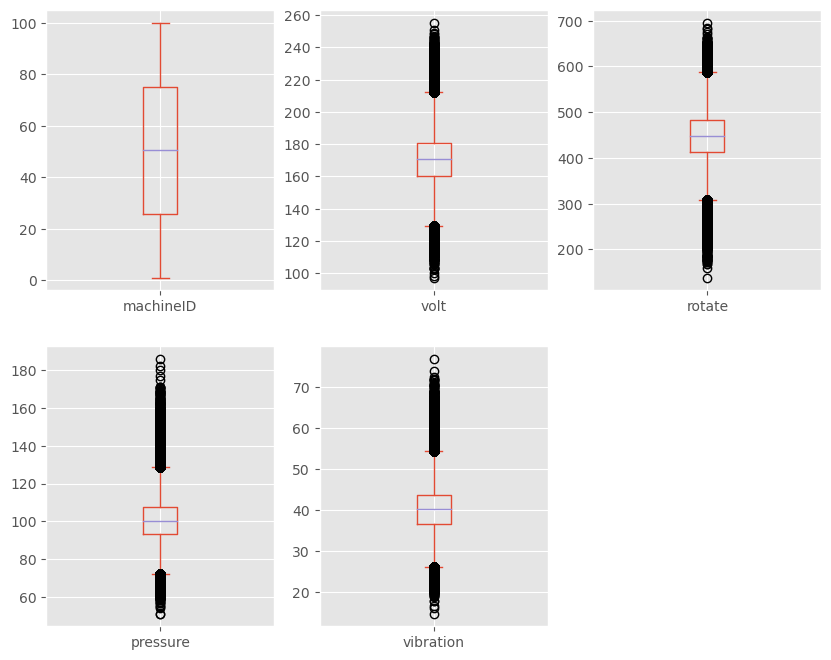


===== Porcentaje de outliers para PdM_telemetry =====
    Variable  % Outliers
0  machineID    0.000000
1       volt    0.852186
2     rotate    0.977971
3   pressure    1.779135
4  vibration    1.268234

========= Boxplot PdM_errors =========


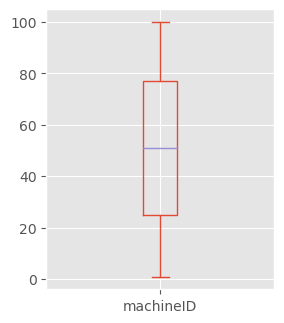


===== Porcentaje de outliers para PdM_errors =====
    Variable  % Outliers
0  machineID         0.0

========= Boxplot PdM_maint =========


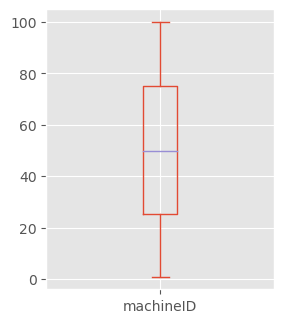


===== Porcentaje de outliers para PdM_maint =====
    Variable  % Outliers
0  machineID         0.0

========= Boxplot PdM_failures =========


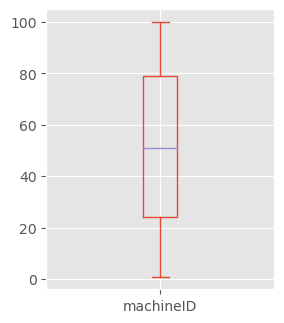


===== Porcentaje de outliers para PdM_failures =====
    Variable  % Outliers
0  machineID         0.0

========= Boxplot PdM_machines =========


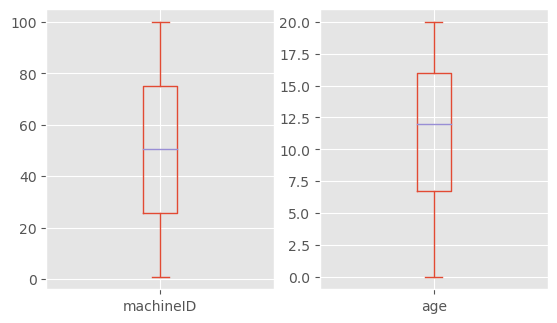


===== Porcentaje de outliers para PdM_machines =====
    Variable  % Outliers
0  machineID         0.0
1        age         0.0


In [33]:
# Se crea un boxplot para cada variable de los datasets para detectar posibles outliers
for name, dataset in datasets.items():
    print(f"\n========= Boxplot {name} =========")
    dataset.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,8))
    plt.show()

    # Se calcular el porcentaje de outliers 
    print(f"\n===== Porcentaje de outliers para {name} =====")
    total_rows = len(dataset)
    outliers = {}

    for column in dataset.select_dtypes(include=['float', 'int']):
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)].shape[0]
        outliers[column] = (outlier_count / total_rows) * 100

    # Se muestran los resultados 
    outliers_df = pd.DataFrame(outliers.items(), columns=['Variable', '% Outliers'])
    print(outliers_df)



En los diagramas de caja se observan valores extremos para las variables `volt`, `rotate`, `pressure` y `vibration`, lo que indica la presencia de valores atípicos. 
Se opta por no eliminar ni tratar los valores atípicos dado que es de esperar que la máquina pueda tener comportamientos atípicos antes de fallar y que estos son los valores fuera de lo normal detectados por los sensores.
Dado que lo que lo que se busca es predecir el fallo, estos valores atípicos son los que permiten detectar comportamientos anómalos producidos antes del fallo.

## 5.2 Transformación de los datos
###  5.2.1 Conversión de tipo de variable
Se transforman las fechas (variable `datetime`) en los datasets a  formato *datetime*. Las variables `errorID`, `failure`, `comp` y `model` se encuentran como variables de tipo objeto (*string*) y se deben transformar a variables de tipo categoricas.

In [34]:
# PdM_telemetry
# Se transforman las fechas a formato datetime 
telemetry_data["datetime"] = pd.to_datetime(telemetry_data["datetime"], format="%Y-%m-%d %H:%M:%S")

In [35]:
# PdM_errors
# Se transforman las fechas a formato datetime 
errors_data["datetime"] = pd.to_datetime(errors_data["datetime"], format="%Y-%m-%d %H:%M:%S")

# Se  convierte 'errorID' a tipo categórico
errors_data['errorID'] = errors_data['errorID'].astype('category')

In [36]:
# PdM_failures
# Se transforman las fechas a formato datetime 
failures_data["datetime"] = pd.to_datetime(failures_data["datetime"], format="%Y-%m-%d %H:%M:%S")

# Se  convierte 'failure' a tipo categórico
failures_data['failure'] = failures_data['failure'].astype('category')

In [37]:
# PdM_maint
# Se transforman las fechas a formato datetime 
maint_data["datetime"] = pd.to_datetime(maint_data["datetime"], format="%Y-%m-%d %H:%M:%S")

# Se  convierte 'comp' a tipo categórico
maint_data['comp'] = maint_data['comp'].astype('category')

In [38]:
# PdM_machines
# Se  convierte 'model' a tipo categórico
machines_data['model'] = machines_data['model'].astype('category')

In [39]:
# Se comprueba la conversión
for name, dataset in datasets.items():
    print(f"\n========= Resumen del dataset {name} =========\n")
    dataset.info()


========= Resumen del dataset PdM_telemetry =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB

========= Resumen del dataset PdM_errors =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   c

### 5.2.2 Combinación de datasets

Para trabajar con los datos, se crea un nuevo dataframe que integra la información de los cinco archivos que componen el conjunto de datos. Antes de realizar esta integración, se genera un nuevo dataset que contiene únicamente la información de mantenimiento preventivo. Esto se debe a que el dataset de mantenimiento incluye tanto datos de mantenimiento proactivo como reactivo de las máquinas. Dado que el dataset de fallos constituye un subconjunto del dataset de mantenimiento, es necesario evitar la redundancia. Por ello, se extrae únicamente la información de mantenimiento preventivo, que se utiliza en el análisis posterior en lugar del conjunto de datos de mantenimiento.

In [40]:
# Obtención de los datos de mantenimiento preventivo

# Se renombra la columna 'failure' a 'comp' en el dataset de fallos para facilitar la comparación
failures = failures_data.rename(columns={'failure': 'comp'})

# Se identifican los registros  de mantenimiento reactivo (comunes entre mantenimiento y fallos)
reactive_maintenance = maint_data.merge(failures, on=['datetime', 'machineID', 'comp'], how='inner')

# Se filtran solo los registros de mantenimiento preventivo
preventive_data = maint_data[~maint_data.index.isin(reactive_maintenance.index)]

# Resumen del dataset de mantenimiento preventivo
preventive_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2543 entries, 743 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   2543 non-null   datetime64[ns]
 1   machineID  2543 non-null   int64         
 2   comp       2543 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 62.3 KB


In [41]:
# Se crea el dataset final
# Se añaden el modelo y la edad de cada máquina al dataframe de telemetría
data= pd.merge(left=telemetry_data,right=machines_data , how='left',
left_on=['machineID'],
right_on=['machineID'])

In [42]:
# Se añaden los datos de errores
data= pd.merge(left=data,right=errors_data , how='left',
left_on=['datetime', 'machineID'],
right_on=['datetime', 'machineID'])

In [43]:
# Se añaden los datos de mantenimiento preventivo
data= pd.merge(left=data,right=preventive_data, how='left',
left_on=['datetime', 'machineID'],
right_on=['datetime', 'machineID'])

In [44]:
# Se añaden los datos de fallos
data= pd.merge(left=data,right=failures_data , how='left',
left_on=['datetime', 'machineID'],
right_on=['datetime', 'machineID'])

In [45]:
# Información del dataset final
print("Resumen del dataset final")
data.info()

Resumen del dataset final
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877032 entries, 0 to 877031
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   877032 non-null  datetime64[ns]
 1   machineID  877032 non-null  int64         
 2   volt       877032 non-null  float64       
 3   rotate     877032 non-null  float64       
 4   pressure   877032 non-null  float64       
 5   vibration  877032 non-null  float64       
 6   model      877032 non-null  category      
 7   age        877032 non-null  int64         
 8   errorID    3922 non-null    category      
 9   comp       2287 non-null    category      
 10  failure    1034 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(4), int64(2)
memory usage: 50.2 MB


Se comprueba  si al unir los datasets se han generado valores faltantes o duplicados.

In [46]:
# Se comprueba si hay valores faltantes o duplicados
print("\nSe comprueba si hay valores faltantes o duplicados:")
print("Valores faltantes:")
print(data.isnull().sum())       # Valores faltantes por columna
print("\nDuplicados:", data.duplicated().sum()) 

# Se muestra el número de observaciones y variables
print(f'\nHay {data.shape[0]} registros y {data.shape[1]} variables en el DataFrame.')

# Se muestra el nombre de las variables
print(f'Nombre de las variables: {data.columns.tolist()}')


Se comprueba si hay valores faltantes o duplicados:
Valores faltantes:
datetime          0
machineID         0
volt              0
rotate            0
pressure          0
vibration         0
model             0
age               0
errorID      873110
comp         874745
failure      875998
dtype: int64

Duplicados: 0

Hay 877032 registros y 11 variables en el DataFrame.
Nombre de las variables: ['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration', 'model', 'age', 'errorID', 'comp', 'failure']


No hay duplicados pero si hay valores faltantes. Se reemplazan los valores faltantes por una etiqueta descriptiva para indicar que no ha habido error, fallo o mantenimiento alguno en esa máquina y fecha analizada.

In [47]:
# Se reemplazan los valores NaN con etiquetas descriptivas para mayor claridad
replacement_map = {
    'errorID': 'NoError',
    'failure': 'NoFailure',
    'comp': 'NoMaintenance'
}

for col, replacement in replacement_map.items():
    if col in data.columns:
        if pd.api.types.is_categorical_dtype(data[col]):
            # Agregar el valor descriptivo como categoría si es necesario
            if replacement not in data[col].cat.categories:
                data[col] = data[col].cat.add_categories([replacement])
        
        # Reemplazar los valores NaN con la etiqueta descriptiva
        data[col] = data[col].fillna(replacement)

In [48]:
# Se comprueba que ya no hay valores faltantes
print("Valores faltantes:")
print(data.isnull().sum())       

Valores faltantes:
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
model        0
age          0
errorID      0
comp         0
failure      0
dtype: int64


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877032 entries, 0 to 877031
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   877032 non-null  datetime64[ns]
 1   machineID  877032 non-null  int64         
 2   volt       877032 non-null  float64       
 3   rotate     877032 non-null  float64       
 4   pressure   877032 non-null  float64       
 5   vibration  877032 non-null  float64       
 6   model      877032 non-null  category      
 7   age        877032 non-null  int64         
 8   errorID    877032 non-null  category      
 9   comp       877032 non-null  category      
 10  failure    877032 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(4), int64(2)
memory usage: 50.2 MB


In [50]:
# Se realiza un análisis estadístico de las variables numéricas del DataFrame
data.describe()

,datetime,machineID,volt,rotate,pressure,vibration,age
count,877032,877032.000000,877032.000000,877032.000000,877032.000000,877032.000000,877032.000000
mean,2015-07-02 18:02:50.975289600,50.506319,170.780334,446.574542,100.860647,40.386138,11.330313
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000
25%,2015-04-02 12:00:00,26.000000,160.305791,412.270012,93.498496,36.777799,7.000000
50%,2015-07-02 18:00:00,51.000000,170.608952,447.540652,100.426163,40.238173,12.000000
75%,2015-10-02 00:00:00,76.000000,181.007492,482.159521,107.556705,43.786012,16.000000
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000
std,NaN,28.864143,15.511087,52.695813,11.051437,5.371684,5.827612


In [51]:
# Se reordenan las columnas en el DataFrame 
cols = data.columns.tolist()
data = data[cols[:2] + cols[6:8] + cols[2:6] + cols[8:]]

In [52]:
data.head()

,datetime,machineID,model,age,volt,rotate,pressure,vibration,errorID,comp,failure
0,2015-01-01 06:00:00,1,model3,18,176.217853,418.504078,113.077935,45.087686,NoError,NoMaintenance,NoFailure
1,2015-01-01 07:00:00,1,model3,18,162.879223,402.747490,95.460525,43.413973,NoError,NoMaintenance,NoFailure
2,2015-01-01 08:00:00,1,model3,18,170.989902,527.349825,75.237905,34.178847,NoError,NoMaintenance,NoFailure
3,2015-01-01 09:00:00,1,model3,18,162.462833,346.149335,109.248561,41.122144,NoError,NoMaintenance,NoFailure
4,2015-01-01 10:00:00,1,model3,18,157.610021,435.376873,111.886648,25.990511,NoError,NoMaintenance,NoFailure


### 5.2.3 Codificación de variables categóricas

In [53]:
# Se codifica la variable `failure` como multiclase
label_encoder = LabelEncoder()
data['failure'] = label_encoder.fit_transform(data['failure'])

# Se aplicar One-Hot Encoding para el resto de variables categóricas 
data_encoded = pd.get_dummies(data, columns=['model', 'errorID', 'comp'], drop_first=False)

# Se convierten todas las columnas booleanas a enteros
data_encoded = data_encoded.astype({col: 'int' for col in data_encoded.select_dtypes('bool').columns})

###  5.2.4 Normalización  de  las variables
Se normalizan las variables porque tienen rangos muy diferentes, lo que puede afectar a los modelos.

In [54]:
# Se seleccionan las variables numéricas para escalar
numeric_cols = ['volt', 'rotate', 'pressure', 'vibration', 'age']

# Se crea un escalador
scaler = StandardScaler()

# Se escalan las variables numéricas
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

In [55]:
# Se verifican las estadísticas después del escalado
data_encoded[numeric_cols].describe()

,volt,rotate,pressure,vibration,age
count,8.770320e+05,8.770320e+05,8.770320e+05,8.770320e+05,8.770320e+05
mean,-1.248128e-15,4.191960e-15,-3.264877e-15,-2.916335e-15,-1.374044e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.735114e+00,-5.847574e+00,-4.490237e+00,-4.748808e+00,-1.944248e+00
25%,-6.752943e-01,-6.509919e-01,-6.661717e-01,-6.717336e-01,-7.430686e-01
50%,-1.104902e-02,1.833373e-02,-3.931468e-02,-2.754533e-02,1.149163e-01
75%,6.593453e-01,6.752908e-01,6.058997e-01,6.329255e-01,8.013042e-01
max,5.437687e+00,4.714731e+00,7.699578e+00,6.777196e+00,1.487692e+00


Se comprueba que tras el escalado, las variables  numéricas tienen media = 0 y desviación estándar = 1.

In [56]:
# Se guardar el DataFrame procesado en un archivo CSV nuevo
#data.to_csv("PdM_cleaned.csv", index=False)

# 6. Feature Engineering

Creacion de nuevas variables: de  RUL  y near_failure

Se crean dos  nuevas  columnas para el dataset.
- En la columna `RUL` se calcula el el tiempo restante hasta el próximo fallo para cada máquina.Cuando no hay fallos futuros conocidos, el RUL no se puede calcular directamente y por ello se rellena con  un valor  grande (9999). Este valor actúa como un marcador que identifica estos casos y garantiza que el modelo no interpreta erróneamente estos registros como fallos inminentes al ser un valor lo suficientemente grande como para estar fuera de cualquier rango razonable de tiempo para fallos esperados.Esto evita confusiones con valores reales que podrían indicar fallos cercanos.

- En la columna `near_failure` se indica si hay un fallo en las próximas 168 horas (7 días) para cada uno de los registros.

In [57]:
# Se ordenan los datos por máquina y tiempo
data_encoded = data_encoded.sort_values(by=['machineID', 'datetime'])

# Identificar registros con fallos (1 si hay fallo, 0 si no hay fallo)
# Suponiendo que 'NoFailure' está codificado como 0
data_encoded['is_failure_now'] = data_encoded['failure'].apply(lambda x: 1 if x != 0 else 0)

# Crear columna para el próximo tiempo de fallo
data_encoded['next_failure_time'] = None

# Calcular el próximo fallo por máquina
for machine_id in data_encoded['machineID'].unique():
    # Filtrar datos por máquina
    machine_data = data_encoded[data_encoded['machineID'] == machine_id]
    
    # Obtener tiempos de fallo
    failure_times = machine_data[machine_data['is_failure_now'] == 1]['datetime'].tolist()
    
    # Asignar el tiempo del próximo fallo para cada registro
    next_failure_list = []
    for current_time in machine_data['datetime']:
        next_failure = next((ft for ft in failure_times if ft > current_time), None)
        next_failure_list.append(next_failure)
    
    # Asignar los valores calculados de 'next_failure_time' a las filas correspondientes
    data_encoded.loc[machine_data.index, 'next_failure_time'] = next_failure_list

# Convertir 'next_failure_time' a formato datetime
data_encoded['next_failure_time'] = pd.to_datetime(data_encoded['next_failure_time'])

# Calcular el RUL en horas
data_encoded['RUL'] = ((data_encoded['next_failure_time'] - data_encoded['datetime']).dt.total_seconds() // 3600).fillna(9999).astype(int)

# Asegurarse de que el RUL sea 0 para los registros donde hay fallo actual
data_encoded.loc[data_encoded['is_failure_now'] == 1, 'RUL'] = 0

# Calcular 'near_failure' (1 si hay un fallo en las próximas 168 horas, 0 si no)
data_encoded['near_failure'] = data_encoded['RUL'].apply(lambda x: 1 if 0 <= x <= 168 else 0)

# Se eliminan las columnas intermedias que ya no son necesarias
data_encoded.drop(columns=['is_failure_now', 'next_failure_time'], inplace=True)



In [58]:
# Se reordenan las columnas para mover 'failure' al final
cols = data_encoded.columns.tolist()
data_encoded = data_encoded[cols[:cols.index('failure')] + cols[cols.index('failure')+1:] + ['failure']]


In [59]:
# Se guardar el DataFrame procesado en un archivo CSV nuevo
data_encoded.to_csv("PdM_processed.csv", index=False)